### Notes 
<br> Using the default setup to color nodes applies a "min_max scaling" like strategy to color nodes/sources. This might create conflict when comparing visualizations between condition (e.g., the max value in condition1=.7, while the max value in condition2=.5, it might be hard to discern this from visualizations).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm

import nilearn
from nilearn import datasets
from nilearn import surface
from nilearn import plotting 
from nilearn.image import concat_imgs, mean_img
from mne.stats import fdr_correction

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc

from sklearn.preprocessing import MinMaxScaler

/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load data and compute mean across conditions


In [2]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

columns = ['S-102', 'S-103', 'S-104', 'S-105', 'S-106', 
          'S-107', 'S-108', 'S-109', 'S-110', 'S-112',
          'S-114', 'S-115', 'S-116', 'S-117', 'S-118',
          'S-119', 'S-120', 'S-121', 'S-122', 'S-123',
          'S-124', 'S-125', 'S-126', 'S-129', 'S-130',
          'S-131', 'S-132']

# Creat psudo-empty dataframe for 1st scores 
c1_pc_df1 = pd.DataFrame()
c2_pc_df1 = pd.DataFrame()
c3_pc_df1 = pd.DataFrame()
c4_pc_df1 = pd.DataFrame()

c1_wcs_df1 = pd.DataFrame()
c2_wcs_df1 = pd.DataFrame()
c3_wcs_df1 = pd.DataFrame()
c4_wcs_df1 = pd.DataFrame()

# Creat psudo-empty dataframe for 2nd scores 
c1_pc_df2 = pd.DataFrame()
c2_pc_df2 = pd.DataFrame()
c3_pc_df2 = pd.DataFrame()
c4_pc_df2 = pd.DataFrame()

c1_wcs_df2 = pd.DataFrame()
c2_wcs_df2 = pd.DataFrame()
c3_wcs_df2 = pd.DataFrame()
c4_wcs_df2 = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        c1_pc_mean1 = pc_c1[0, :] 
        c2_pc_mean1 = pc_c2[0, :] 
        c3_pc_mean1 = pc_c3[0, :] 
        c4_pc_mean1 = pc_c4[0, :] 
        
        c1_wcs_mean1 = wcs_c1[0, :] 
        c2_wcs_mean1 = wcs_c2[0, :] 
        c3_wcs_mean1 = wcs_c3[0, :] 
        c4_wcs_mean1 = wcs_c4[0, :] 
        
        c1_pc_mean2 = pc_c1[1, :] 
        c2_pc_mean2 = pc_c2[1, :] 
        c3_pc_mean2 = pc_c3[1, :] 
        c4_pc_mean2 = pc_c4[1, :] 
        
        c1_wcs_mean2 = wcs_c1[1, :] 
        c2_wcs_mean2 = wcs_c2[1, :] 
        c3_wcs_mean2 = wcs_c3[1, :] 
        c4_wcs_mean2 = wcs_c4[1, :] 
        
        # Appending data to df1
        c1_pc_df1[name] = c1_pc_mean1
        c2_pc_df1[name] = c2_pc_mean1
        c3_pc_df1[name] = c3_pc_mean1
        c4_pc_df1[name] = c4_pc_mean1
        
        c1_wcs_df1[name] = c1_wcs_mean1
        c2_wcs_df1[name] = c2_wcs_mean1
        c3_wcs_df1[name] = c3_wcs_mean1
        c4_wcs_df1[name] = c4_wcs_mean1
        
        # Appending data to df2
        c1_pc_df2[name] = c1_pc_mean2
        c2_pc_df2[name] = c2_pc_mean2
        c3_pc_df2[name] = c3_pc_mean2
        c4_pc_df2[name] = c4_pc_mean2
        
        c1_wcs_df2[name] = c1_wcs_mean2
        c2_wcs_df2[name] = c2_wcs_mean2
        c3_wcs_df2[name] = c3_wcs_mean2
        c4_wcs_df2[name] = c4_wcs_mean2

             
print("c1_pc_df1 shape: " + str(c1_pc_df1.shape))
print("c2_pc_df1 shape: " + str(c2_pc_df1.shape))
print("c3_pc_df1 shape: " + str(c3_pc_df1.shape))
print("c4_pc_df1 shape: " + str(c4_pc_df1.shape))

print("\nc1_wcs_df1 shape: " + str(c1_wcs_df1.shape))
print("c2_wcs_df1 shape: " + str(c2_wcs_df1.shape))
print("c3_wcs_df1 shape: " + str(c3_wcs_df1.shape))
print("c4_wcs_df1 shape: " + str(c4_wcs_df1.shape))

print("\nc1_pc_df2 shape: " + str(c1_pc_df2.shape))
print("c2_pc_df2 shape: " + str(c2_pc_df2.shape))
print("c3_pc_df2 shape: " + str(c3_pc_df2.shape))
print("c4_pc_df2 shape: " + str(c4_pc_df2.shape))

print("\nc1_wcs_df2 shape: " + str(c1_wcs_df2.shape))
print("c2_wcs_df2 shape: " + str(c2_wcs_df2.shape))
print("c3_wcs_df2 shape: " + str(c3_wcs_df2.shape))
print("c4_wcs_df2 shape: " + str(c4_wcs_df2.shape))

c1_pc_df1 shape: (400, 26)
c2_pc_df1 shape: (400, 26)
c3_pc_df1 shape: (400, 26)
c4_pc_df1 shape: (400, 26)

c1_wcs_df1 shape: (400, 26)
c2_wcs_df1 shape: (400, 26)
c3_wcs_df1 shape: (400, 26)
c4_wcs_df1 shape: (400, 26)

c1_pc_df2 shape: (400, 26)
c2_pc_df2 shape: (400, 26)
c3_pc_df2 shape: (400, 26)
c4_pc_df2 shape: (400, 26)

c1_wcs_df2 shape: (400, 26)
c2_wcs_df2 shape: (400, 26)
c3_wcs_df2 shape: (400, 26)
c4_wcs_df2 shape: (400, 26)


In [3]:
# Computing mean across participants for each condition
# 1st scores
c1_total_pc_mean1 = np.array(c1_pc_df1.mean(axis=1))
c2_total_pc_mean1 = np.array(c2_pc_df1.mean(axis=1))
c3_total_pc_mean1 = np.array(c3_pc_df1.mean(axis=1))
c4_total_pc_mean1 = np.array(c4_pc_df1.mean(axis=1))

print("c1_total_pc_mean1 shape: " + str(c1_total_pc_mean1.shape))
print("c2_total_pc_mean1 shape: " + str(c2_total_pc_mean1.shape))
print("c3_total_pc_mean1 shape: " + str(c3_total_pc_mean1.shape))
print("c4_total_pc_mean1 shape: " + str(c4_total_pc_mean1.shape))

c1_total_wcs_mean1 = np.array(c1_wcs_df1.mean(axis=1))
c2_total_wcs_mean1 = np.array(c2_wcs_df1.mean(axis=1))
c3_total_wcs_mean1 = np.array(c3_wcs_df1.mean(axis=1))
c4_total_wcs_mean1 = np.array(c4_wcs_df1.mean(axis=1))

print("\nc1_total_wcs_mean1 shape: " + str(c1_total_wcs_mean1.shape))
print("c2_total_wcs_mean1 shape: " + str(c2_total_wcs_mean1.shape))
print("c3_total_wcs_mean1 shape: " + str(c3_total_wcs_mean1.shape))
print("c4_total_wcs_mean1 shape: " + str(c4_total_wcs_mean1.shape))

# 2nd scores
c1_total_pc_mean2 = np.array(c1_pc_df2.mean(axis=1))
c2_total_pc_mean2 = np.array(c2_pc_df2.mean(axis=1))
c3_total_pc_mean2 = np.array(c3_pc_df2.mean(axis=1))
c4_total_pc_mean2 = np.array(c4_pc_df2.mean(axis=1))

print("\nc1_total_pc_mean2 shape: " + str(c1_total_pc_mean2.shape))
print("c2_total_pc_mean2 shape: " + str(c2_total_pc_mean2.shape))
print("c3_total_pc_mean2 shape: " + str(c3_total_pc_mean2.shape))
print("c4_total_pc_mean2 shape: " + str(c4_total_pc_mean2.shape))

c1_total_wcs_mean2 = np.array(c1_wcs_df2.mean(axis=1))
c2_total_wcs_mean2 = np.array(c2_wcs_df2.mean(axis=1))
c3_total_wcs_mean2 = np.array(c3_wcs_df2.mean(axis=1))
c4_total_wcs_mean2 = np.array(c4_wcs_df2.mean(axis=1))

print("\nc1_total_wcs_mean2 shape: " + str(c1_total_wcs_mean2.shape))
print("c2_total_wcs_mean2 shape: " + str(c2_total_wcs_mean2.shape))
print("c3_total_wcs_mean2 shape: " + str(c3_total_wcs_mean2.shape))
print("c4_total_wcs_mean2 shape: " + str(c4_total_wcs_mean2.shape))


c1_total_pc_mean1 shape: (400,)
c2_total_pc_mean1 shape: (400,)
c3_total_pc_mean1 shape: (400,)
c4_total_pc_mean1 shape: (400,)

c1_total_wcs_mean1 shape: (400,)
c2_total_wcs_mean1 shape: (400,)
c3_total_wcs_mean1 shape: (400,)
c4_total_wcs_mean1 shape: (400,)

c1_total_pc_mean2 shape: (400,)
c2_total_pc_mean2 shape: (400,)
c3_total_pc_mean2 shape: (400,)
c4_total_pc_mean2 shape: (400,)

c1_total_wcs_mean2 shape: (400,)
c2_total_wcs_mean2 shape: (400,)
c3_total_wcs_mean2 shape: (400,)
c4_total_wcs_mean2 shape: (400,)


## Compute high vs. low interference

In [4]:
# 1st scores
PC_low_int_1 = np.array((c1_total_pc_mean1 + c2_total_pc_mean1)/2)
PC_high_int_1 = np.array((c3_total_pc_mean1 + c4_total_pc_mean1)/2)

print("PC_low_int_1 shape: " + str(PC_low_int_1.shape))
print("PC_high_int_1 shape: " + str(PC_high_int_1.shape))

WCS_low_int_1 = np.array((c1_total_wcs_mean1 + c2_total_wcs_mean1)/2)
WCS_high_int_1 = np.array((c3_total_wcs_mean1 + c4_total_wcs_mean1)/2)

print("\nWCS_low_int_1 shape: " + str(WCS_low_int_1.shape))
print("WCS_high_int_1 shape: " + str(WCS_high_int_1.shape))

# 2nd scores
PC_low_int_2 = np.array((c1_total_pc_mean2 + c2_total_pc_mean2)/2)
PC_high_int_2 = np.array((c3_total_pc_mean2 + c4_total_pc_mean2)/2)

print("\nPC_low_int_2 shape: " + str(PC_low_int_2.shape))
print("PC_high_int_2 shape: " + str(PC_high_int_2.shape))

WCS_low_int_2 = np.array((c1_total_wcs_mean2 + c2_total_wcs_mean2)/2)
WCS_high_int_2 = np.array((c3_total_wcs_mean2 + c4_total_wcs_mean2)/2)

print("\nWCS_low_int_2 shape: " + str(WCS_low_int_2.shape))
print("WCS_high_int_2 shape: " + str(WCS_high_int_2.shape))

PC_low_int_1 shape: (400,)
PC_high_int_1 shape: (400,)

WCS_low_int_1 shape: (400,)
WCS_high_int_1 shape: (400,)

PC_low_int_2 shape: (400,)
PC_high_int_2 shape: (400,)

WCS_low_int_2 shape: (400,)
WCS_high_int_2 shape: (400,)


## Get coordinates from each node

In [5]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()

coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


,x,y,z
0,-35.365696,-62.032362,-17.055016
1,-23.350588,-72.696471,-10.296471
2,-36.414566,-81.389356,-15.966387
3,-16.950000,-86.387500,-14.987500
4,-24.406780,-96.745763,-11.924670


In [6]:
# Edit coords 
fixed_coords_left = coordinates[0:200]
fixed_coords_left[0:200, 0] = fixed_coords_left[0:200, 0] + 5

fixed_coords_right = coordinates[200:400]
fixed_coords_right[0:200, 0] = fixed_coords_right[0:200, 0] - 5

print(fixed_coords_left.shape)

(200, 3)


## Useful functions 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def SaveImg_RemoveBackground(scene, name2save):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    pil_img.save(str(name2save), "PNG")
    
    return pil_img
    
def RemoveBackground(scene):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    
    return pil_img



In [8]:
def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', coords, **kwargs) #color=colors,
    
    # Add color to nodes
    s_obj.color_sources(data=data, cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())) #, vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )

def add_CB_to_scene(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    cb_proj = ColorbarObj(s_obj, cblabel=cbtitle, cmap="viridis", cbtxtsz=12, txtsz=10., 
                          vmax=data.max(), vmin=data.min(), limtxt=False, width=.05, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4)) 
    scene.add_to_subplot(cb_proj, row=row, col=col) 

In [9]:
def add_B3_to_scene2(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', coords, **kwargs) #color=colors,
    
    # Add color to nodes    
    s_obj.color_sources(data=data, cmap="viridis", clim=(0, 1)) #, vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )

def add_CB_to_scene2(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    cb_proj = ColorbarObj(s_obj, cblabel=cbtitle, cmap="viridis", cbtxtsz=12, txtsz=10., 
                          vmax=1, vmin=0, limtxt=False, width=.05, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4)) 
    scene.add_to_subplot(cb_proj, row=row, col=col) 

In [10]:
# Maximum absolute scaling function 

def maximum_absolute_scaling(data):
    
    data_c = data.copy()
    m = data.size
    # Apply maximum absolute scaling
    for x in range(m):
        data_c[x] = data[x]  / np.absolute(data).max()
    return data_c


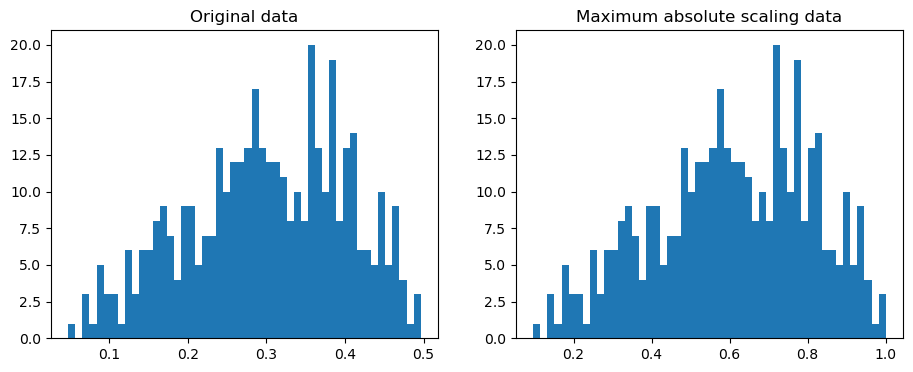

In [11]:
# Checking output of 'maximum_absolute_scaling' function with PC_low_int_1 data

max_abs_check = pd.DataFrame((PC_low_int_1, maximum_absolute_scaling(PC_low_int_1)))

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
    
axs[0].hist(PC_low_int_1, bins=50)
axs[0].set_title('Original data')
    
axs[1].hist(maximum_absolute_scaling(PC_low_int_1), bins=50)
axs[1].set_title('Maximum absolute scaling data')
plt.show()

In [12]:
# Min-max scaling function 

def min_max_scal(data):
    
    data_c = data.copy()
    m = data.size
    
    # Apply maximum absolute scaling
    for x in range(m):
        data_c[x] = (data[x] - data.min())/(data.max() - data.min())
        
    return data_c


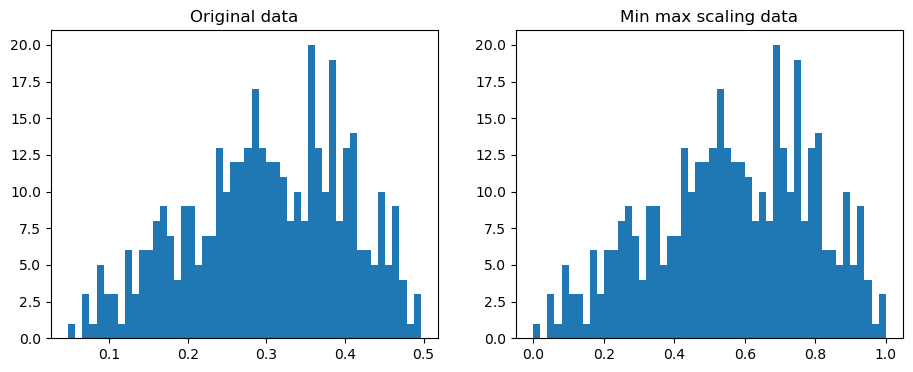

In [13]:
# Checking output of 'maximum_absolute_scaling' function with PC_low_int_1 data

min_max_scl_check = pd.DataFrame((PC_low_int_1, min_max_scal(PC_low_int_1)))

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
    
axs[0].hist(PC_low_int_1, bins=50)
axs[0].set_title('Original data')
    
axs[1].hist(min_max_scal(PC_low_int_1), bins=50)
axs[1].set_title('Min max scaling data')
plt.show()

In [14]:
# Z-score standarization
def z_scorer(data):
    
    data_c = data.copy()
    m = data.size
    
    # Apply maximum absolute scaling
    for x in range(m):
        data_c[x] = (data[x] - data.mean())/data.std()
        
    return data_c

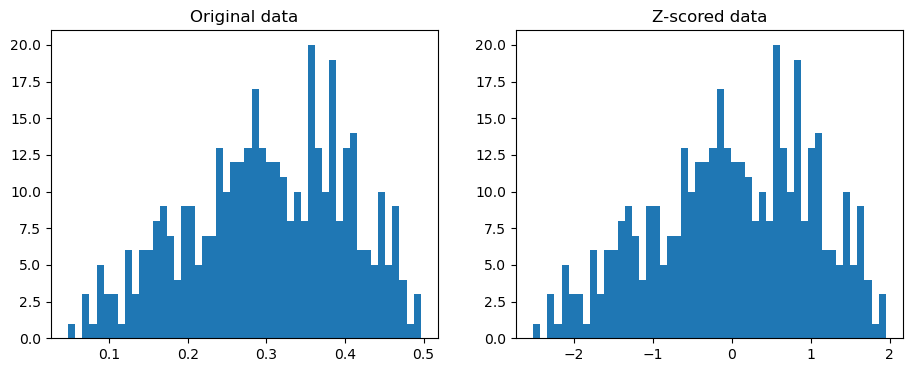

In [15]:
# Checking output of 'z_scorer' function with PC_low_int_1 data
z_scorer_check = pd.DataFrame((PC_low_int_1, z_scorer(PC_low_int_1)))

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
    
axs[0].hist(PC_low_int_1, bins=50)
axs[0].set_title('Original data')
    
axs[1].hist(z_scorer(PC_low_int_1), bins=50)
axs[1].set_title('Z-scored data')
plt.show()

In [16]:
# Robust scaling
def robust_scaling(data):
    
    data_c = data.copy()
    m = data.size
    
    quantile1 = np.quantile(data, 0.25)
    quantile2 = np.quantile(data, 0.5)
    quantile3 = np.quantile(data, 0.75)
    
    # Apply maximum absolute scaling
    for x in range(m):
        data_c[x] = (data[x] - quantile2)/(quantile3 - quantile1)
        
    return data_c


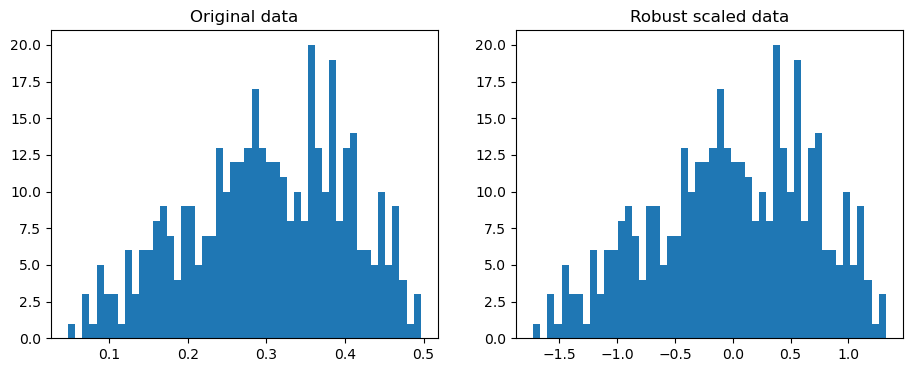

In [17]:
# Checking output of 'robust_scaling' function with PC_low_int_1 data
rob_scl_check = pd.DataFrame((PC_low_int_1, robust_scaling(PC_low_int_1)))

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
    
axs[0].hist(PC_low_int_1, bins=50)
axs[0].set_title('Original data')
    
axs[1].hist(robust_scaling(PC_low_int_1), bins=50)
axs[1].set_title('Robust scaled data')
plt.show()


# Brain-plots 

## Normal Brain plot

In [18]:
# Create Scene 
SC_PC1_lh_outer = SceneObj(bgcolor='black', size=(2000, 1200))
SC_PC1_lh_inner = SceneObj(bgcolor='black', size=(2000, 1200))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(na

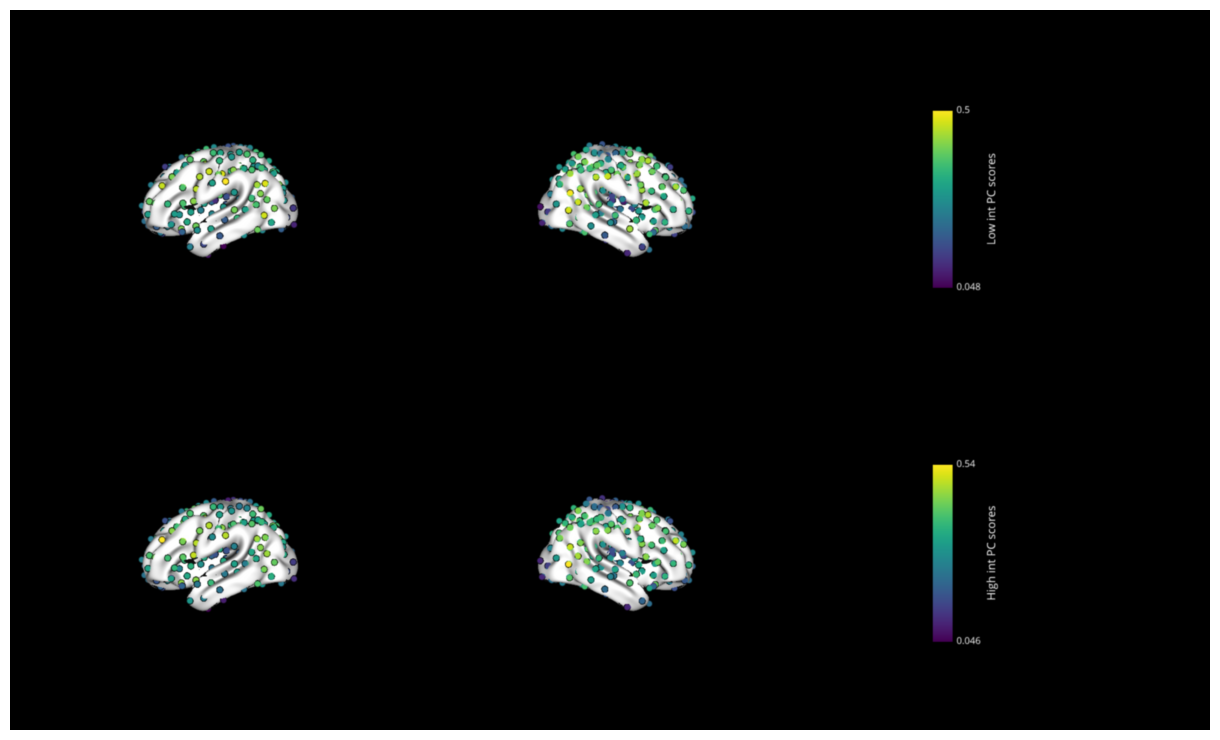

In [19]:
add_B3_to_scene(scene=SC_PC1_lh_outer, data=PC_low_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC1_lh_outer, data=PC_low_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_lh_outer, data=PC_low_int_1, row=0, col=2, cbtitle="Low int PC scores")

add_B3_to_scene(scene=SC_PC1_lh_outer, data=PC_high_int_1, coords=coordinates, row=1, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC1_lh_outer, data=PC_high_int_1, coords=coordinates, row=1, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_lh_outer, data=PC_high_int_1, row=1, col=2, cbtitle="High int PC scores")

SC_PC1_lh_outer.preview()
# Note there are some slight differences in the max, min values between conditions.

## Normal Brain plot (fixing range of coloring-plots to [0, 1])

In [20]:
# Create Scene 
SC_PC1_lh_outer = SceneObj(bgcolor='black', size=(2000, 1200))
SC_PC1_lh_inner = SceneObj(bgcolor='black', size=(2000, 1200))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(na

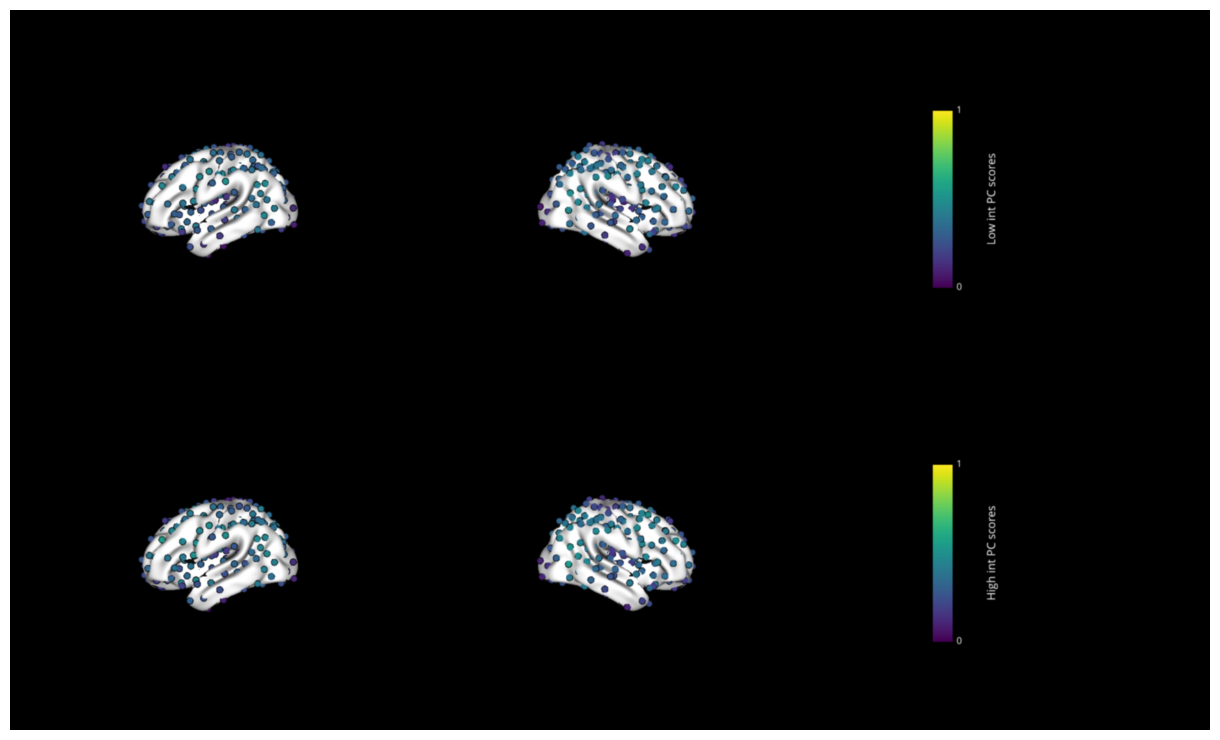

In [21]:
add_B3_to_scene2(scene=SC_PC1_lh_outer, data=PC_low_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene2(scene=SC_PC1_lh_outer, data=PC_low_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene2(scene=SC_PC1_lh_outer, data=PC_low_int_1, row=0, col=2, cbtitle="Low int PC scores")

add_B3_to_scene2(scene=SC_PC1_lh_outer, data=PC_high_int_1, coords=coordinates, row=1, col=0, hemisphere='both', orientation='left')
add_B3_to_scene2(scene=SC_PC1_lh_outer, data=PC_high_int_1, coords=coordinates, row=1, col=1, hemisphere='both', orientation='right')
add_CB_to_scene2(scene=SC_PC1_lh_outer, data=PC_high_int_1, row=1, col=2, cbtitle="High int PC scores")

SC_PC1_lh_outer.preview()

## Brain plots with Maximum absolute scaling

In [22]:
max_abs_PC_low_int_1 = maximum_absolute_scaling(PC_low_int_1)
max_abs_PC_high_int_1 = maximum_absolute_scaling(PC_high_int_1)

In [23]:
# Create Scene 
SC_PC1_lh_outer = SceneObj(bgcolor='black', size=(2000, 1200))
SC_PC1_lh_inner = SceneObj(bgcolor='black', size=(2000, 1200))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(na

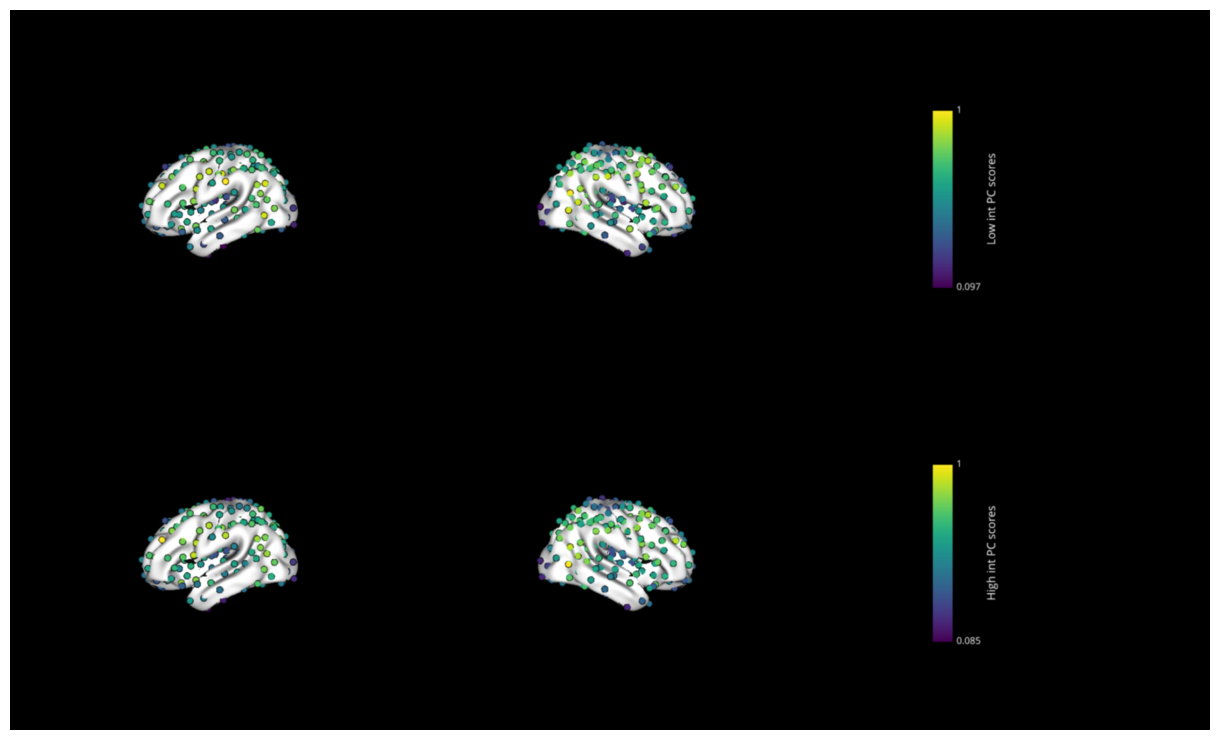

In [24]:
add_B3_to_scene(scene=SC_PC1_lh_outer, data=max_abs_PC_low_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC1_lh_outer, data=max_abs_PC_low_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_lh_outer, data=max_abs_PC_low_int_1, row=0, col=2, cbtitle="Low int PC scores")

add_B3_to_scene(scene=SC_PC1_lh_outer, data=max_abs_PC_high_int_1, coords=coordinates, row=1, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC1_lh_outer, data=max_abs_PC_high_int_1, coords=coordinates, row=1, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_lh_outer, data=max_abs_PC_high_int_1, row=1, col=2, cbtitle="High int PC scores")

SC_PC1_lh_outer.preview()

In [25]:
# Normalizing data jointly, then plotting c1 and c2 in different brains
def coupled_add_B3_to_scene(scene, data, coords):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data[0:400]
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj1 = SourceObj('SourceExample', coords, **kwargs) 
    s_obj2 = SourceObj('SourceExample', coords, **kwargs) 
    
    # Add color to nodes
    s_obj1.color_sources(data=data[0:400], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())) #, vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())
    s_obj2.color_sources(data=data[0:400], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    
    # Create 'Brain object'
    b_obj1 = BrainObj('B3', hemisphere="both", translucent=False)
    b_obj2 = BrainObj('B3', hemisphere="both", translucent=False)
    
    # Add objects to scene
    scene.add_to_subplot(s_obj1, row=0, col=0, row_span=1, **KW) 
    scene.add_to_subplot(b_obj1, row=0, col=0, row_span=1, rotate="left", use_this_cam=True )
    scene.add_to_subplot(s_obj2, row=0, col=1, row_span=1, **KW) 
    scene.add_to_subplot(b_obj2, row=0, col=1, row_span=1, rotate="right", use_this_cam=True )
    
    # Add data
    kwargs['data'] = data[400:800]
    
    # Create 'source object'    
    s_obj3 = SourceObj('SourceExample', coords, **kwargs) 
    s_obj4 = SourceObj('SourceExample', coords, **kwargs) 
    
    # Add color to nodes
    s_obj3.color_sources(data=data[400:800], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    s_obj4.color_sources(data=data[400:800], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    
    # Create 'Brain object'
    b_obj3 = BrainObj('B3', hemisphere="both", translucent=False)
    b_obj4 = BrainObj('B3', hemisphere="both", translucent=False)
    
    # Add objects to scene
    scene.add_to_subplot(s_obj3, row=1, col=0, row_span=1, **KW) 
    scene.add_to_subplot(b_obj3, row=1, col=0, row_span=1, rotate="left", use_this_cam=True )
    scene.add_to_subplot(s_obj4, row=1, col=1, row_span=1, **KW) 
    scene.add_to_subplot(b_obj4, row=1, col=1, row_span=1, rotate="right", use_this_cam=True )
    
def add_CB_to_scene(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    cb_proj = ColorbarObj(s_obj, cblabel=cbtitle, cmap="viridis", cbtxtsz=12, txtsz=10., 
                          vmax=data.max(), vmin=data.min(), limtxt=False, width=.05, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4)) 
    scene.add_to_subplot(cb_proj, row=row, col=col) 


In [26]:
PC1 = np.hstack((PC_low_int_1, PC_high_int_1))
PC1 = maximum_absolute_scaling(PC1)

In [29]:
# Create Scene 
SC_PC1_lh_outer = SceneObj(bgcolor='black', size=(2000, 1200))
SC_PC1_lh_inner = SceneObj(bgcolor='black', size=(2000, 1200))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample')

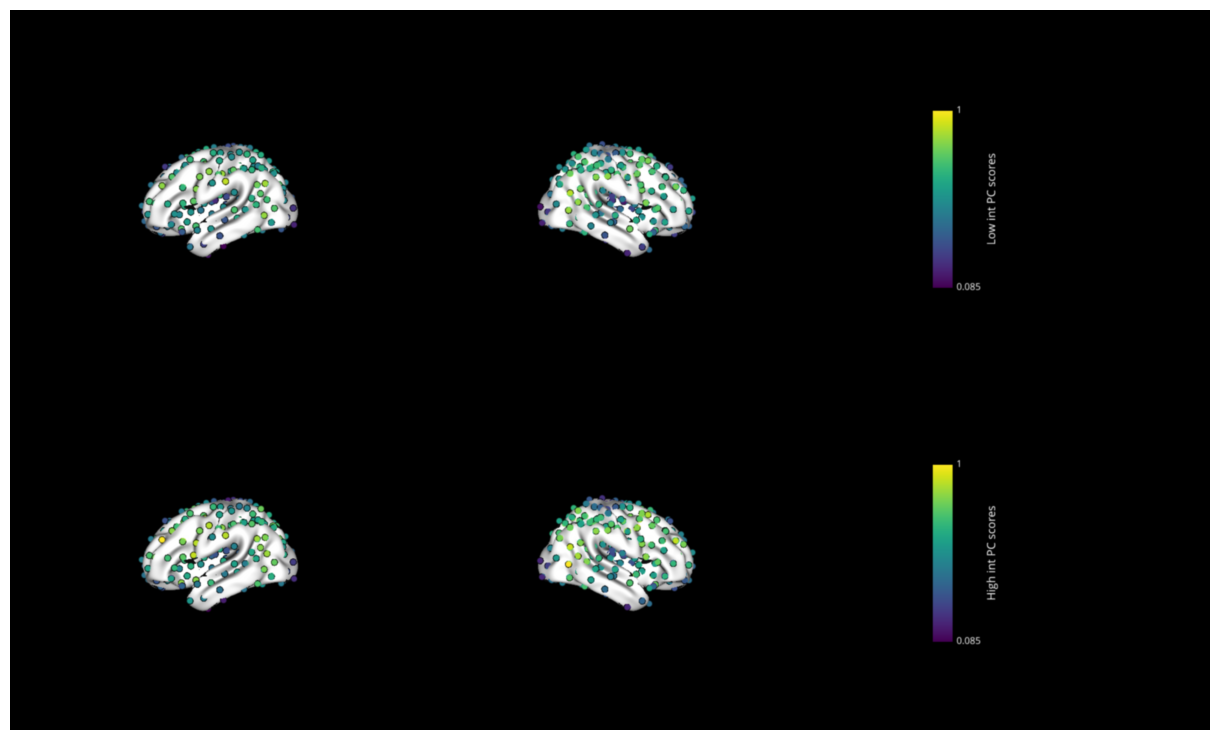

In [30]:
coupled_add_B3_to_scene(scene=SC_PC1_lh_outer, data=PC1, coords=coordinates)
add_CB_to_scene(scene=SC_PC1_lh_outer, data=PC1, row=0, col=2, cbtitle="Low int PC scores")
add_CB_to_scene(scene=SC_PC1_lh_outer, data=PC1, row=1, col=2, cbtitle="High int PC scores")

SC_PC1_lh_outer.preview()

## Brain plots with min-max scaling

In [31]:
PC1 = np.hstack((PC_low_int_1, PC_high_int_1))
PC1 = min_max_scal(PC1)

In [32]:
# Create Scene 
SC_PC1_lh_outer = SceneObj(bgcolor='black', size=(2000, 1200))
SC_PC1_lh_inner = SceneObj(bgcolor='black', size=(2000, 1200))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample')

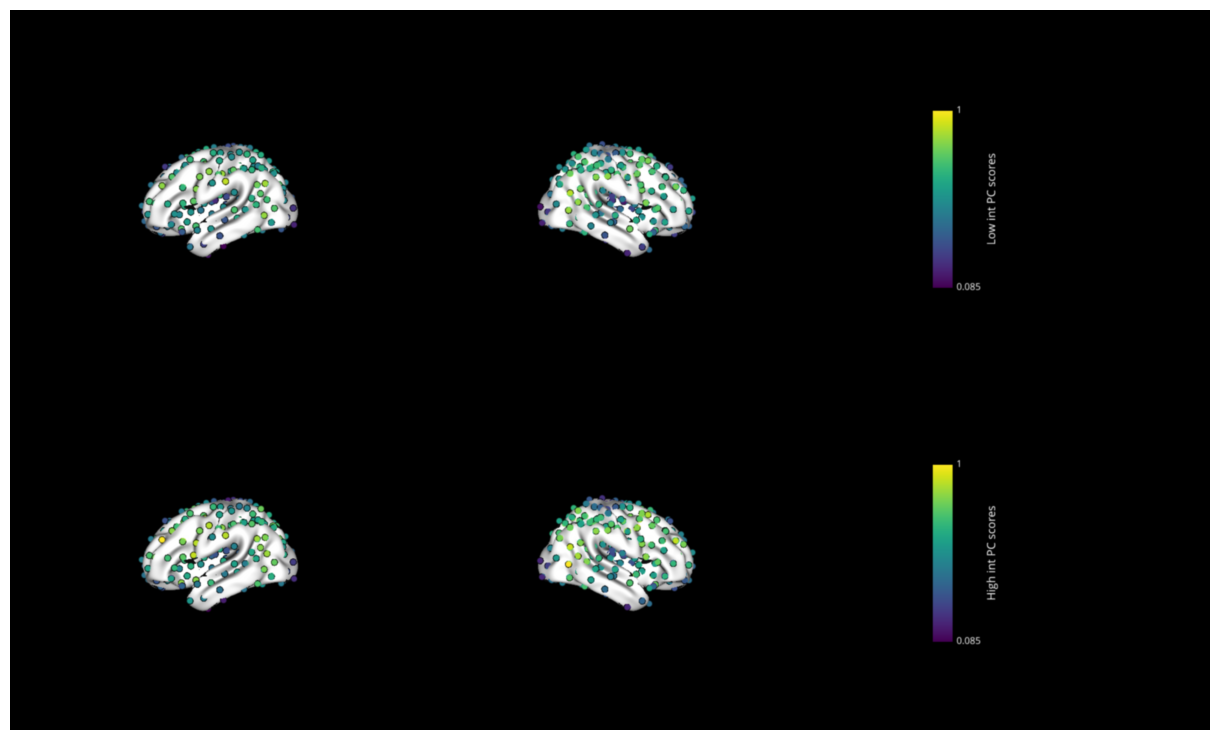

In [33]:
coupled_add_B3_to_scene(scene=SC_PC1_lh_outer, data=PC1, coords=coordinates)
add_CB_to_scene(scene=SC_PC1_lh_outer, data=PC1, row=0, col=2, cbtitle="Low int PC scores")
add_CB_to_scene(scene=SC_PC1_lh_outer, data=PC1, row=1, col=2, cbtitle="High int PC scores")

SC_PC1_lh_outer.preview()